In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1 - Qual a quantidade de imóveis por nível?
    
    - Nível 0 : Preço entre R$: 0.00 e R$ 321.950
    - Nível 1 : Preço entre R$: 321.950 e R$ 450.000
    - Nível 2 : Preço entre R$: 450.000 e R$ 645.000
    - Nível 3 : Preço acima de R$ 650.000

In [2]:
data = pd.read_csv('dataset/kc_house_data.csv')

In [3]:
data['nivel'] = data['price'].apply(lambda x : 0 if (x > 0 and x < 321950) else
                                               1 if (x < 450000) else
                                               2 if (x < 645000) else
                                               3 if (x> 650000)  else  np.NaN)

In [4]:
data.loc[data['price']  < 645000, ['id','price','nivel']]

,id,price,nivel
0,7129300520,221900.0,0.0
1,6414100192,538000.0,2.0
2,5631500400,180000.0,0.0
3,2487200875,604000.0,2.0
4,1954400510,510000.0,2.0
...,...,...,...
21608,263000018,360000.0,1.0
21609,6600060120,400000.0,1.0
21610,1523300141,402101.0,1.0
21611,291310100,400000.0,1.0


### eda

<AxesSubplot:>

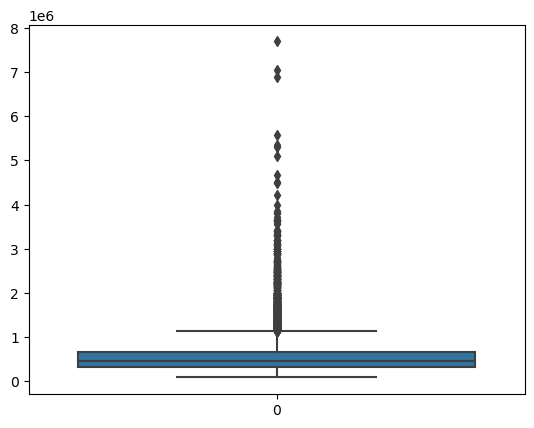

In [5]:
sns.boxplot(data=data['price'])

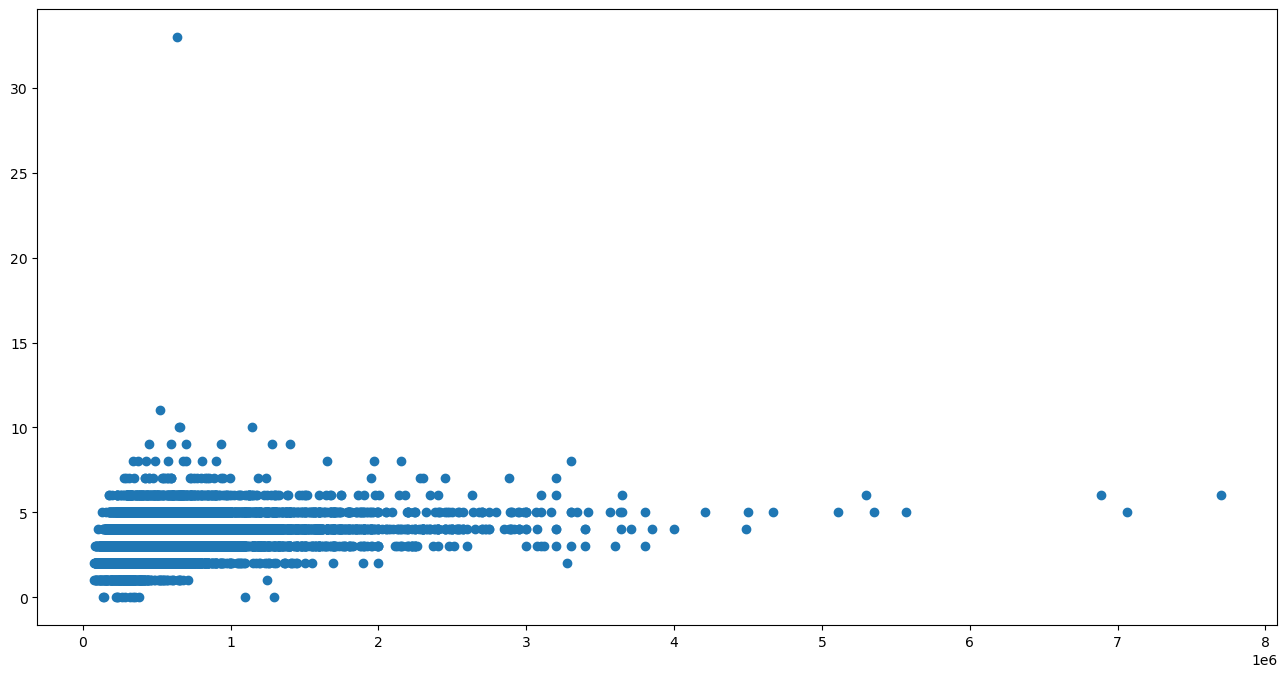

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['price'], data['bedrooms'])

    
## 2 - Adicionone as seguintes informações ao imóvel
    
    - Nome da Rua
    - Número do imóvel
    - Nome do Bairro
    - Nome da cidade
    - Nome do estado


In [7]:
from geopy.geocoders import Nominatim

In [11]:
# Initialize Nominatim
geolocator=Nominatim(user_agent= 'geoapiExercises',timeout=3)

In [12]:
response = geolocator.reverse('47.5112, -122.257')

In [22]:
response.raw['display_name']

'10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States'

In [ ]:
data['road'] = 'NA'
data['house_number'] = 'NA'
data['city'] = 'NA'
data['county'] = 'NA'
data['state'] = 'NA'

geolocator=Nominatim(user_agent= 'geoapiExercises',timeout=3)


for i in range(len(data)):
    print(f'Loop {i}/{len(data)}')
    #make query
    query =  str(data.loc[i,'lat'])+','+str(data.loc[i,'long'])
    
    # API Request
    #print(response.raw['address'])
    response = geolocator.reverse(query)
    
    #populate data 
    if 'road' in response.raw['address']:
        data.loc[i,'road'] = response.raw['address']['road']
    if 'house_number' in response.raw['address']:
        data.loc[i,'house_number'] = response.raw['address']['house_number']
    if 'city' in response.raw['address']:
        data.loc[i,'city'] = response.raw['address']['city']
    if 'county' in response.raw['address']:
        data.loc[i,'county'] = response.raw['address']['county']
    if 'state' in response.raw['address']:
        data.loc[i,'state'] = response.raw['address']['state']

## 3 - Adicione o nível do imóvel no mapa como uma cor


In [65]:
data = pd.read_csv('dataset/kc_house_data.csv')

In [75]:
houses = data[['id','lat','long','price']].copy()

#definindo preços

houses['nivel'] = houses['price'].apply(lambda x : 0 if (x < 321950) else
                                               1 if (x < 450000) else
                                               2 if (x < 645000) else
                                               3 if (x> 650000) else 0)

In [83]:
houses['level'] = houses['nivel'].astype(int)

fig = px.scatter_mapbox(houses,
                       lat = 'lat',
                       lon = 'long',
                       color = 'level',
                       size = 'price',
                       color_continuous_scale = px.colors.cyclical.IceFire,
                       size_max = 15,
                       zoom = 10)

fig.update_layout(mapbox_style = 'open_street_map')
fig.update_layout(height = 600, margin = {'r':0,'t':0,'l':0,'b':0})
fig.show()